In [20]:
!pip install yfinance==0.2.4
!pip install pandas==1.3.3

!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y
!pip install lxml==4.6.4
!pip install plotly==5.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 90.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.4
    Uninstalling lxml-4.6.4:
      Successfully uninstalled lxml-4.6.4
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.10.0
    Uninstalling beautifulsoup4-4.10.0:
      Successfully uninstalled beautifulsoup4-4.10.0

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔

<h2 id=>Peer-graded Assignment</h2>

<h3 id=>Question 1 Use yfinance to Extract Stock Data</h3>

In [7]:
tickerSymbol="TSLA"

In [4]:
import yfinance as yf
import pandas as pd

In [8]:
tesla_data=yf.Ticker(tickerSymbol)

In [ ]:
tesla_data = tesla_data.history(period='1d', start='2010-1-1', end='2023-03-28')

In [12]:
tesla_data = tesla_data.reset_index()

In [13]:
tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [14]:
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


<h4 id=> Question 2: Use Webscraping to Extract Tesla Revenue Data</h4>

In [21]:
import requests
from bs4 import BeautifulSoup

In [22]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

In [23]:
html_content = requests.get(url).text

In [24]:
soup = BeautifulSoup(html_content, "html.parser")

In [25]:
table = soup.find('table', {'class': 'historical_data_table table'})

In [26]:
table_rows = table.tbody.find_all('tr')

In [27]:
data = []

In [28]:
for row in table_rows:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

In [29]:
tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])

In [30]:
print(tesla_revenue.tail())

    Date Revenue
9   2013  $2,013
10  2012    $413
11  2011    $204
12  2010    $117
13  2009    $112


<h4 id=> Question 3: Use yfinance to Extract Stock Data</h4>

In [31]:
ticker="GME"

In [32]:
gme_data = yf.download(ticker,start="2020-01-01",end="2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [33]:
gme_data.reset_index(inplace=True)

In [34]:
gme_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02 00:00:00-05:00,1.5350,1.6175,1.5175,1.5775,1.5775,17814400
1,2020-01-03 00:00:00-05:00,1.5525,1.5625,1.4600,1.4700,1.4700,14175600
2,2020-01-06 00:00:00-05:00,1.4500,1.4775,1.4000,1.4625,1.4625,13579200
3,2020-01-07 00:00:00-05:00,1.4425,1.4575,1.3600,1.3800,1.3800,20912000
4,2020-01-08 00:00:00-05:00,1.3725,1.4625,1.3525,1.4300,1.4300,22517600


<h4 id=> Question 4: Use Webscraping to Extract GME Revenue Data</h4>

In [42]:
res = requests.get(url)

In [41]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

In [43]:
soup = BeautifulSoup(res.text, 'html.parser')

In [44]:
table = soup.find('table', {'class': 'historical_data_table table'})

In [47]:
gme_revenue = pd.read_html(str(table))[0]

In [ ]:
gme_revenue.drop(columns=['TTM', 'YOY Growth'], inplace=True)

In [48]:
print(gme_revenue.tail())

    GameStop Annual Revenue(Millions of US $)  \
10                                       2013   
11                                       2012   
12                                       2011   
13                                       2010   
14                                       2009   

   GameStop Annual Revenue(Millions of US $).1  
10                                      $8,887  
11                                      $9,551  
12                                      $9,474  
13                                      $9,078  
14                                      $8,806  


<h4 id=> Question 5: Plot Tesla Stock Graph</h4>

Text(0, 0.5, 'Closing Price')

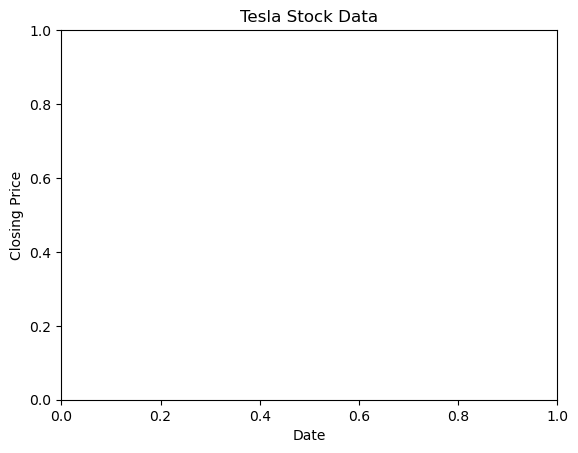

In [56]:
import matplotlib.pyplot as plt
plt.title('Tesla Stock Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')

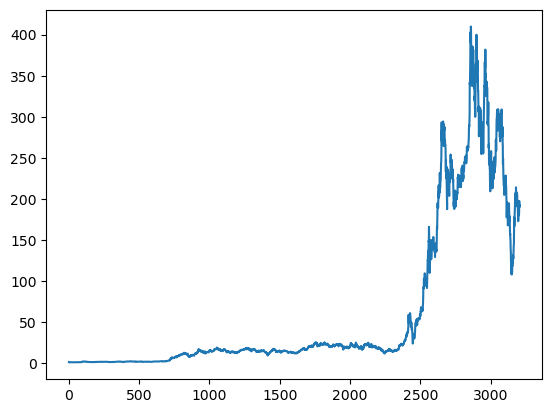

In [58]:
plt.plot(tesla_data.index, tesla_data['Close'])
plt.show()

<h4 id=> Question 6: Plot GameStop Stock Graph</h4>

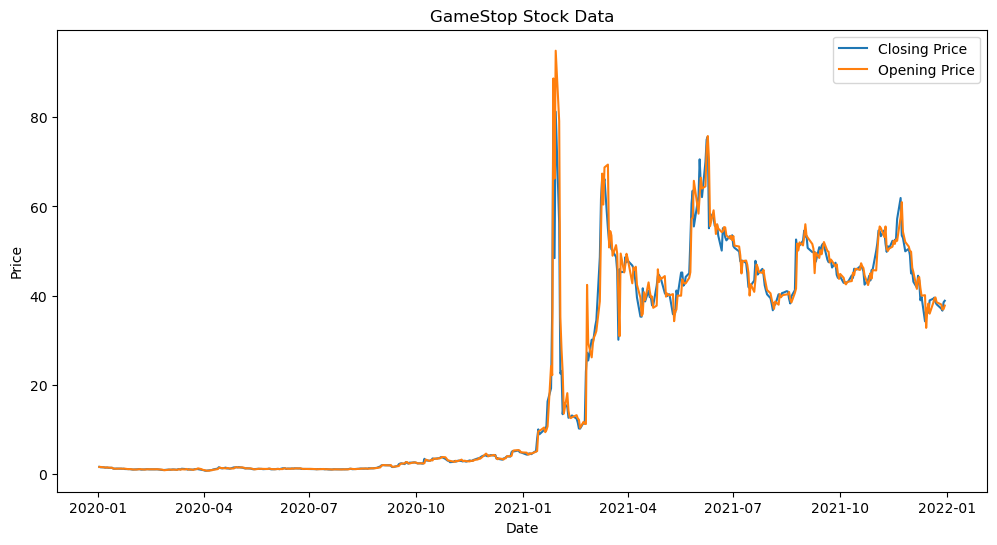

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(gme_data['Date'], gme_data['Close'], label='Closing Price')
plt.plot(gme_data['Date'], gme_data['Open'], label='Opening Price')
plt.title('GameStop Stock Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
